<a href="https://colab.research.google.com/github/lusteriojr/Numerical-and-Symbolic-Computation/blob/main/lab2_titanic_Lusterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory Activity 2

# Step 1

In [28]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2

In [ ]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Step 3

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Step 4

In [32]:
# Fill Age with median method
df["Age"] = df["Age"].fillna(df["Age"].median())


# Step 5

In [ ]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Step 6

In [ ]:
# Convert Survived and Pclass to categorical
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

# Step 7

In [ ]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Step 8

In [ ]:
df.to_csv("titanic_cleaned.csv", index=False)

# import library

In [16]:
import matplotlib.pyplot as plt

# Bar Plot of Survival Count

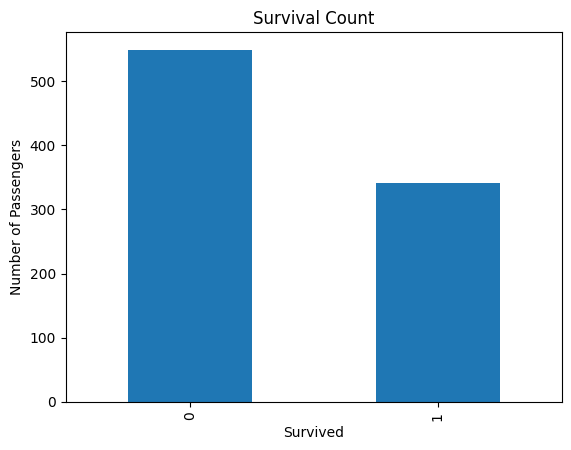

In [ ]:
df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

# Histogram of Age Distribution

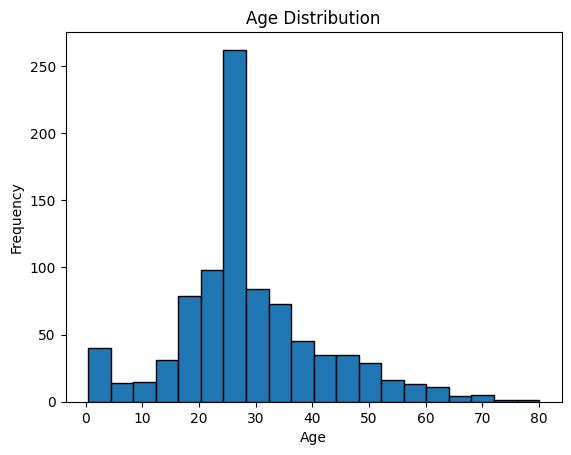

In [ ]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Survival by Gender

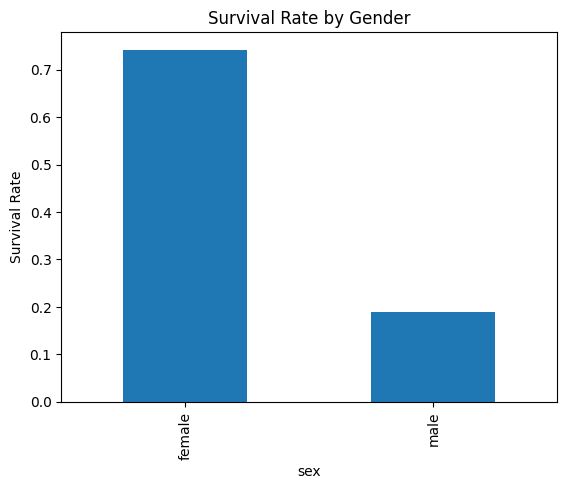

In [ ]:
df["survived"] = df["survived"].astype(int)
df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

# **Question 1**
1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?

**To clean the dataset, I first look for missing values and inconsistencies, using imputation for gaps and normalization for different scales. I also remove any duplicates and check for outliers. I went with this approach because it’s efficient and keeps the data reliable, which is very important for analysis.**

# **Question 2**

2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.

In [21]:
# Display the first few rows of the dataset for understanding
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [34]:
#### Analysis 1: Age vs. Survival Rate

# Calculate survival rate by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['0-12', '13-20', '21-40', '41-60', '61-80'])
age_survival_rate = df.groupby('AgeGroup', observed=True)['Survived'].mean().reset_index()

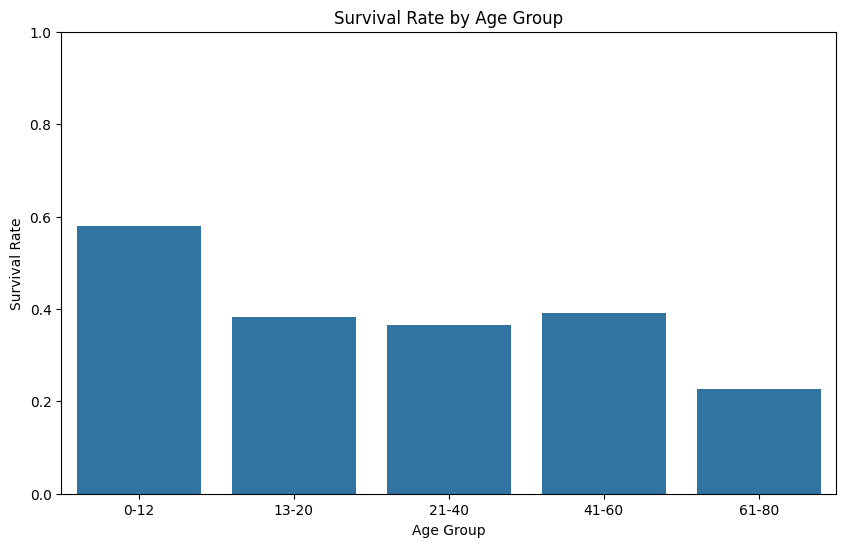

In [25]:
# Visualization
import seaborn as sns # Import the seaborn library and assign it the alias 'sns'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_survival_rate)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # to ensure the y-axis is a percentage
plt.show()

**In my analysis of the `train.csv` dataset, I focused on two main columns: `Age` and `Survived`. First, I looked at how age affects survival rates by creating age groups and calculating the average survival rate for each group. This helped me see which age brackets had better chances of making it through. I used a visualization to show the survival rates by these age groups, and it really illustrated how different ages experienced varying levels of survival during the event.**